#### We are building a machine learning model for an insurance  to predict the number of buildings that will have insurance claim and the ones that will have no claim. It is important to state that class(0) means no insurance claim while class(1) means that there is insurance claim for the building.
Now let us import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\T O S H I B A\Downloads\Train_data.csv")

In [3]:
df.head()        #viewing the first five rows

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
df.head(10)     #viewing the first 10 rows

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [5]:
df.columns          #checking the columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [6]:
df.shape            #checking the number of rows and columns

(7160, 14)

In [7]:
df["NumberOfWindows"].unique()         #to check the nature of the values in a colown

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [8]:
df["NumberOfWindows"].dtype

dtype('O')

In [9]:
df.info()                             #checking important information about our data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [10]:
df["NumberOfWindows"].value_counts()        #helps us to see different items and number of times to appear in the column

NumberOfWindows
   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: count, dtype: int64

In [11]:
df["Customer Id"].value_counts()

Customer Id
H14663    1
H19182    1
H1571     1
H15027    1
H15026    1
         ..
H5025     1
H19098    1
H16571    1
H16570    1
H7470     1
Name: count, Length: 7160, dtype: int64

In [12]:
df["NumberOfWindows"] = df["NumberOfWindows"].replace('   .', np.nan)     #handling the abnormal entry in the column

In [13]:
df.isna().sum()          #checking whether there are missing values in our dataset

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   7
Settlement               0
Building Dimension     106
Building_Type            0
Date_of_Occupancy      508
NumberOfWindows       3551
Geo_Code               102
Claim                    0
dtype: int64

In [14]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,NaN,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,NaN,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,NaN,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [15]:
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,NaN,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,NaN,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,NaN,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,NaN,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,NaN,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [16]:
df["NumberOfWindows"].fillna(df["NumberOfWindows"].mode()[0], inplace=True)      #filling abnormal entry with mode

In [17]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,4,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,4,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,4,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


#### We obviously have missing values in the Building Dimenson Column, Date of Occupancy Column and Geo Code column

In [19]:
df.describe()                     #checking the statistical values of the columns

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [20]:
df.duplicated()               #checking for duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
7155    False
7156    False
7157    False
7158    False
7159    False
Length: 7160, dtype: bool

In [21]:
df.columns                 #to see the columns that we have in our dataset

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [22]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)                 #viewing the null values in percentage

Customer Id           0.00
YearOfObservation     0.00
Insured_Period        0.00
Residential           0.00
Building_Painted      0.00
Building_Fenced       0.00
Garden                0.10
Settlement            0.00
Building Dimension    1.48
Building_Type         0.00
Date_of_Occupancy     7.09
NumberOfWindows       0.00
Geo_Code              1.42
Claim                 0.00
dtype: float64

## Now let us do some Eploratory Data Analysis or Data Visualization

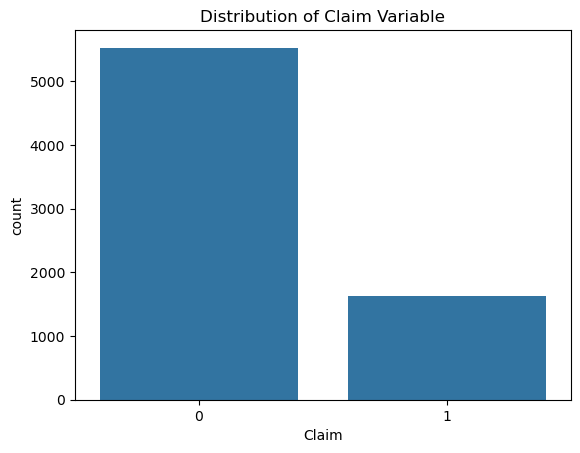

In [23]:
df["Claim"].value_counts(normalize=True)

sns.countplot(x="Claim", data=df)
plt.title('Distribution of Claim Variable')

plt.show()          

#### The bar chat above clearly shows that there is a class imbalance in our dataset. Evaluation metric like Accuracy score can be misleading in a case like this. It is imperative to also note that a models like Random-Forest and XGBoost will be highly recommended because of their ability to handle class imbalance and outliers.

## Now let us do some data Cleaning to remove the null values form our dataset

In [24]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
df.isna().sum()               #checking for null values

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

#### Our data is now clean, missing values have been handled

#### Let us continue with our Data Visualization

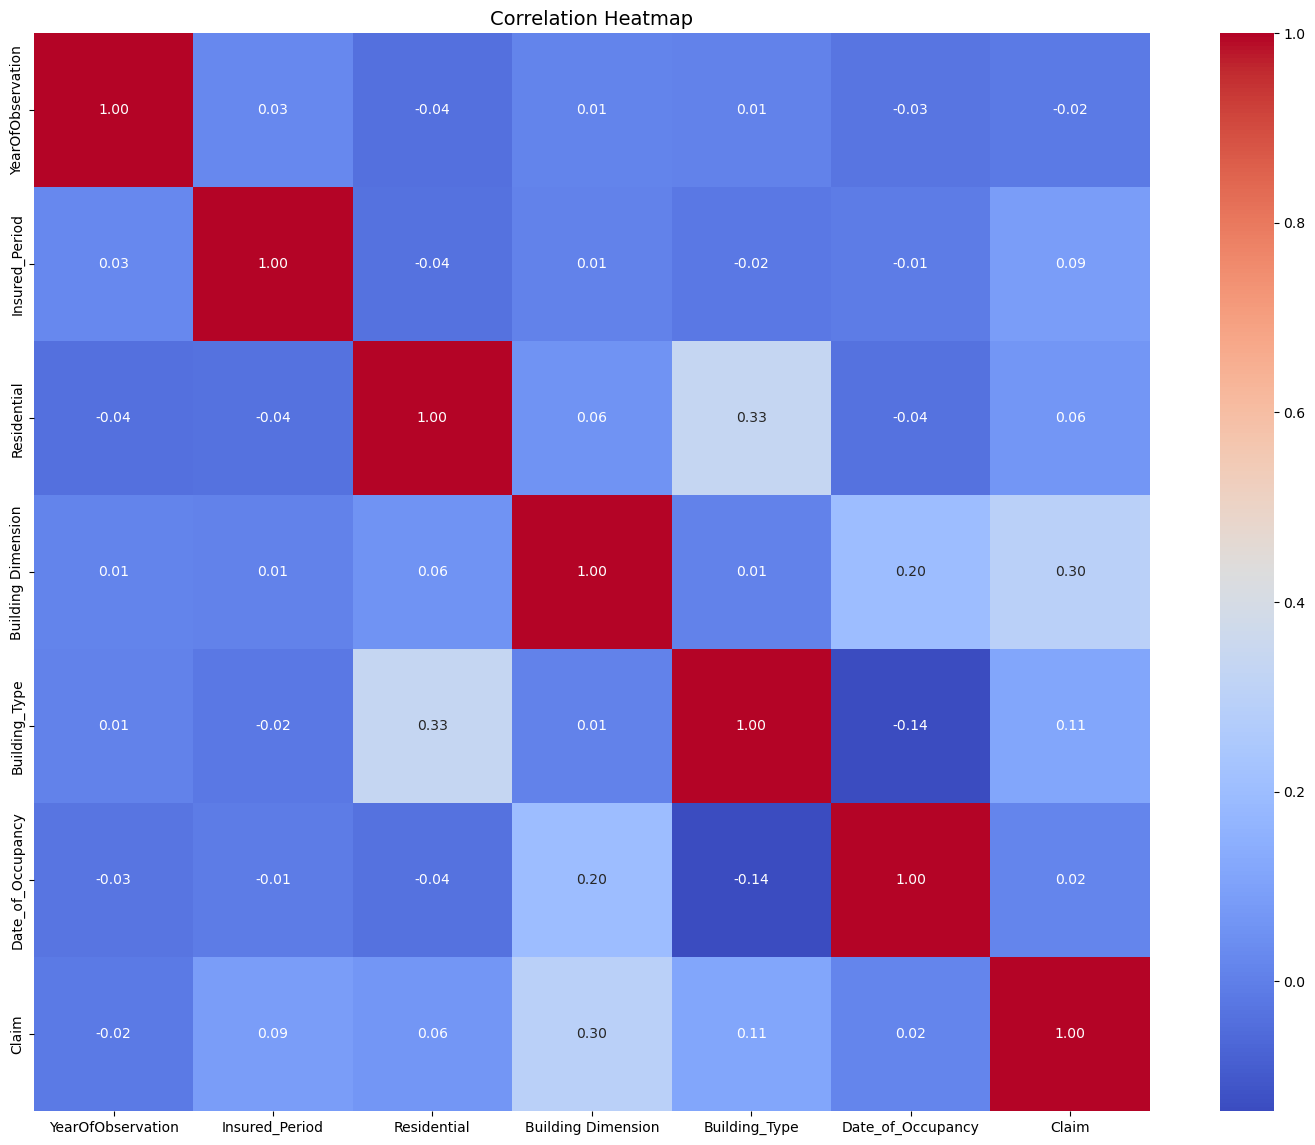

In [26]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18,14))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

#### From the coorection heatmap above, we could deduce that the Building Dimension has the highest impact on the target with about 30% correlation coefficient.

Now let us see the relationship between the target and the numerical varibles using boxplot.

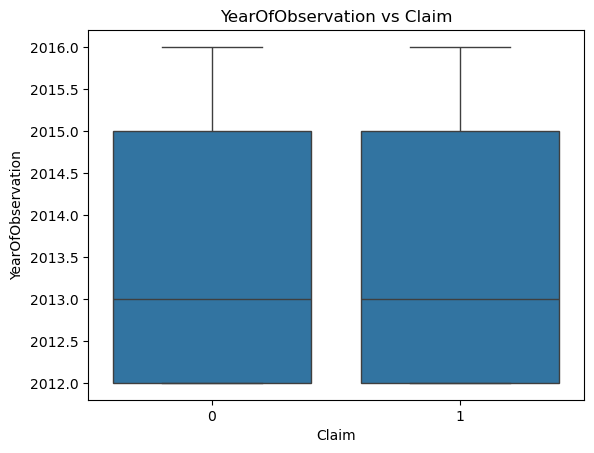

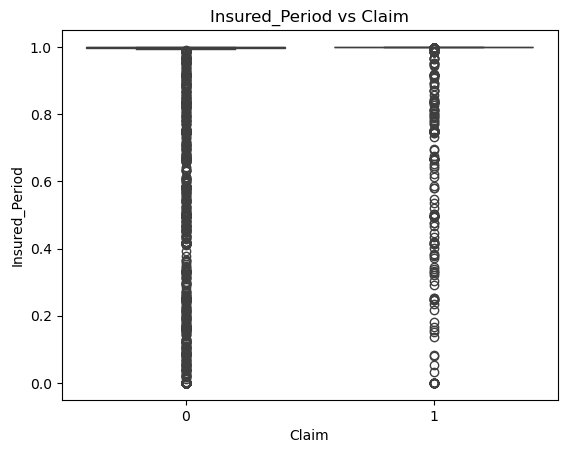

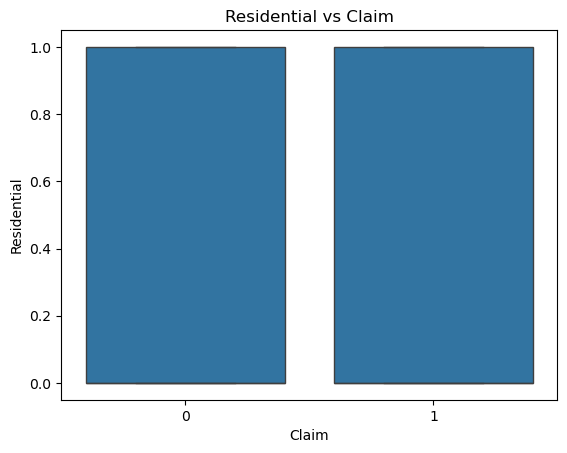

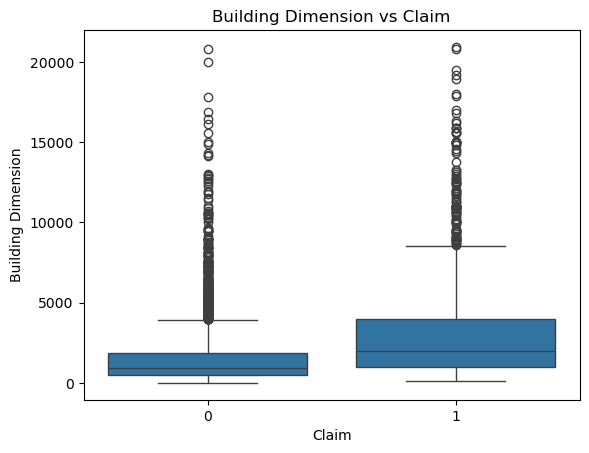

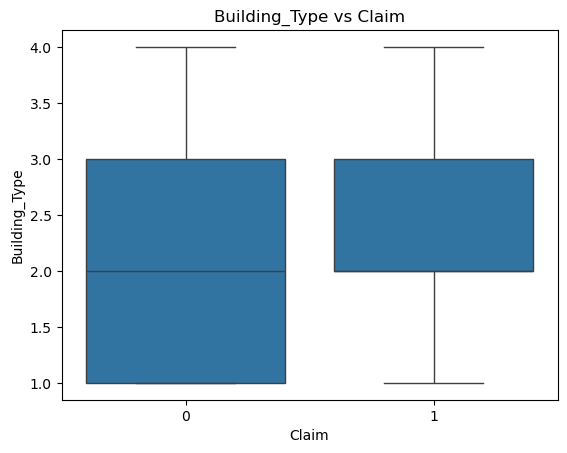

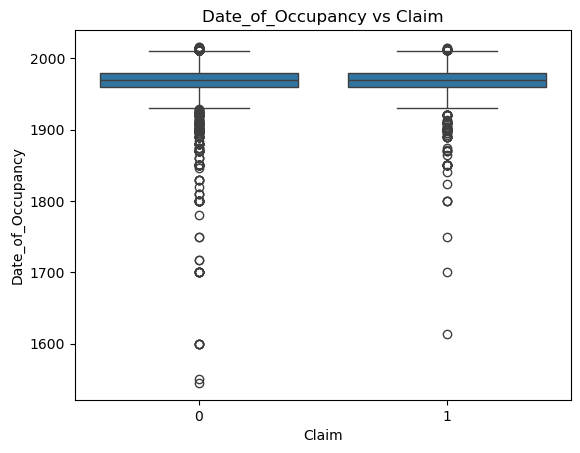

In [27]:
for col in num_cols:
    if col != "Claim":
        sns.boxplot(x="Claim", y=col, data=df)
        plt.title(f"{col} vs Claim")
        plt.show()

##### From the boxplot above, we noticed the precence of outliers in two columns. I will leave the outliers for the models like Random-Forest and xgboost to handle.

#### Let us visualize the numerical variables using Histogram.

In [28]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

num_cols = [col for col in df.columns if df[col].dtype != 'object']

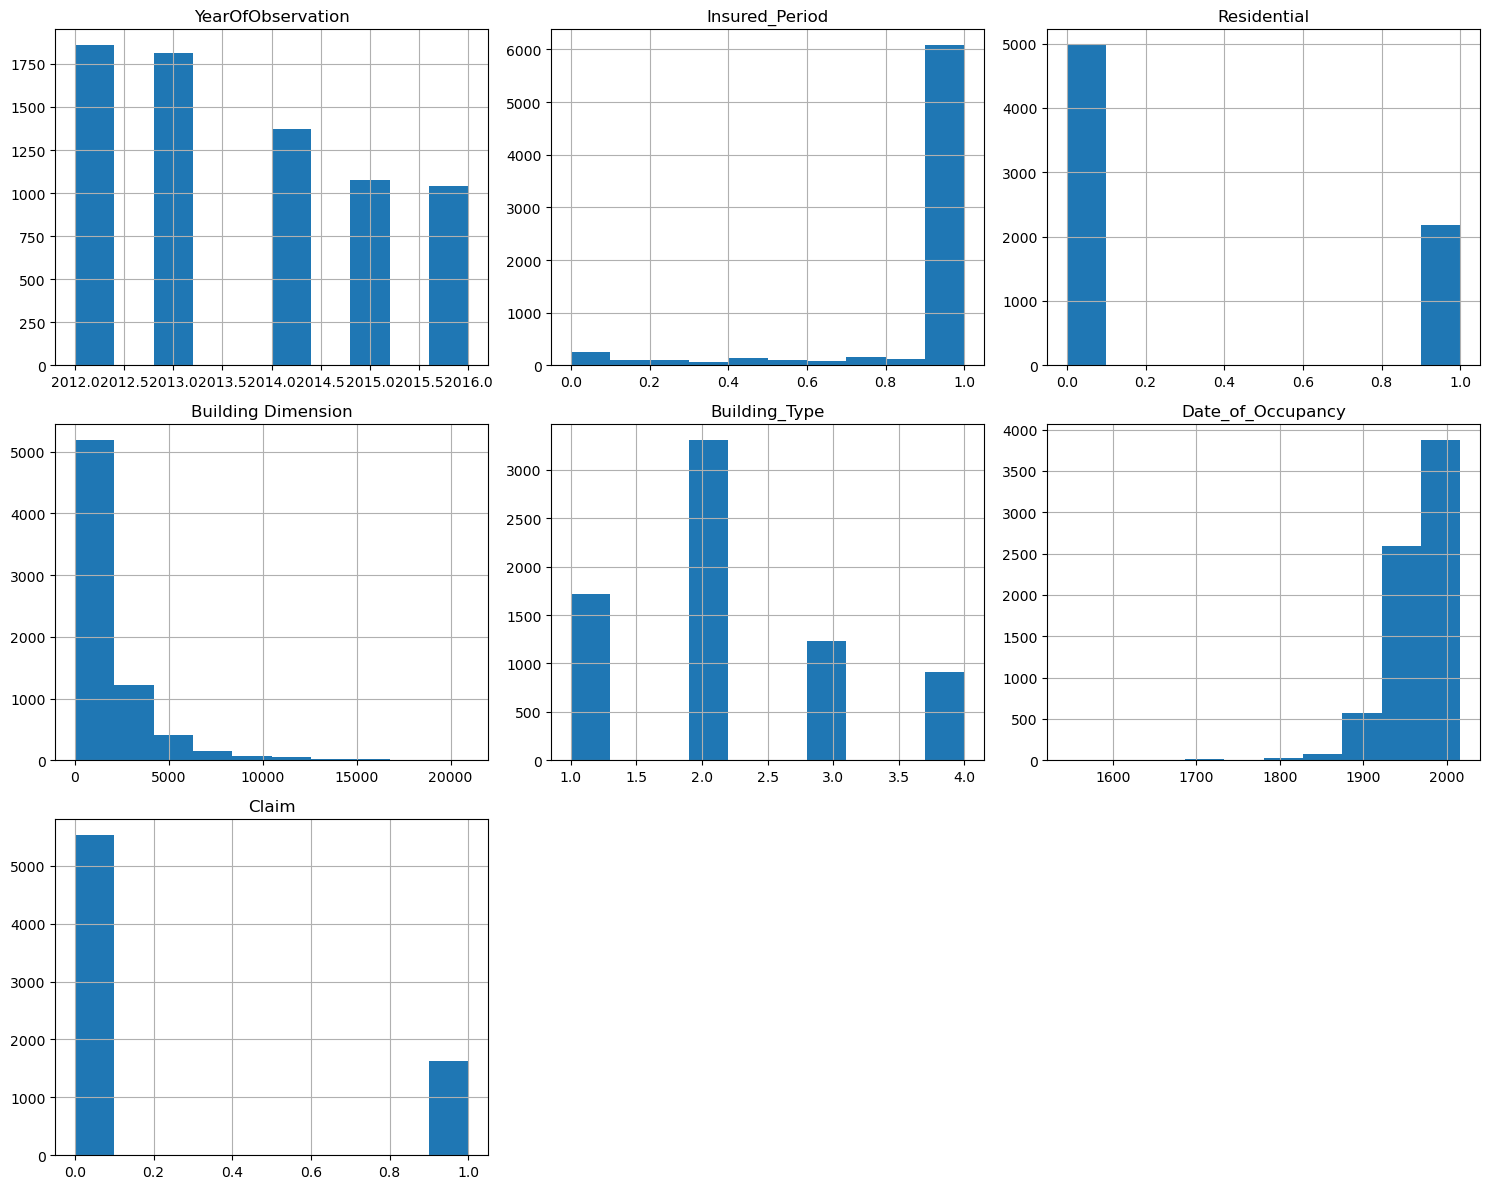

In [29]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df[num_cols].hist(figsize=(15,12))
plt.tight_layout()
plt.show()

##### We could notice some level of outliers from the plot

#### Now let us see the relationship between the target and the categorical varible

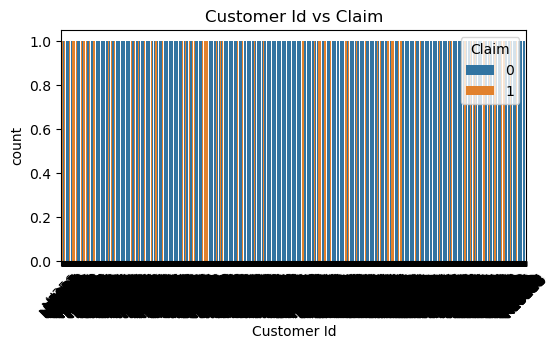

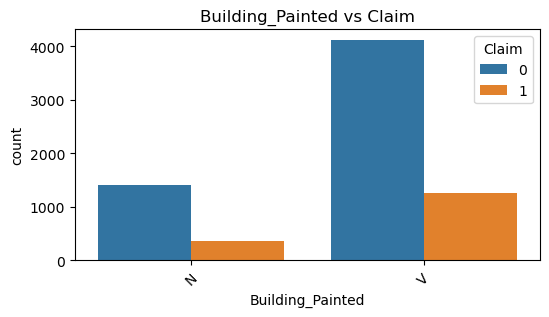

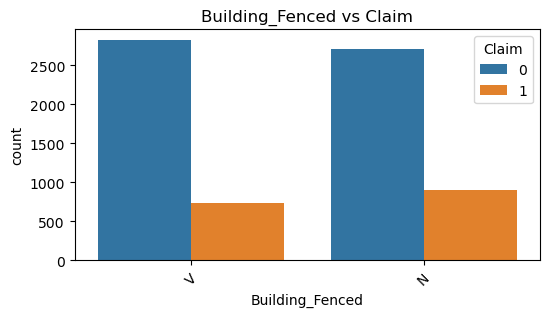

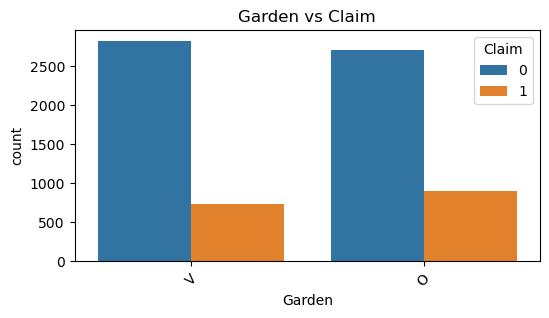

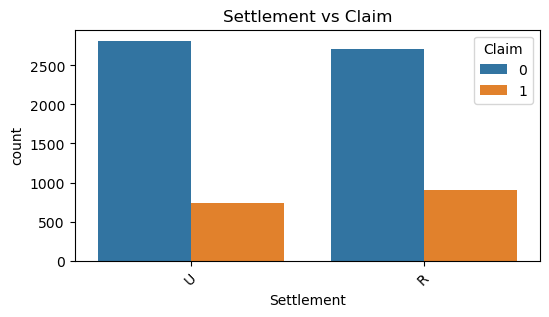

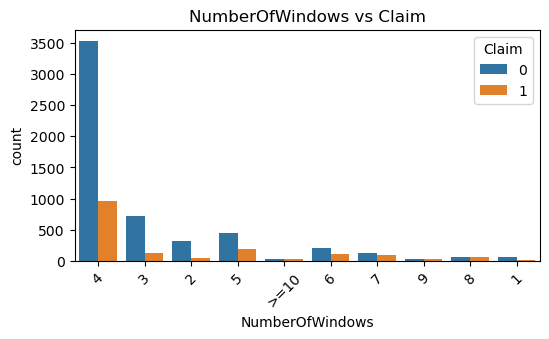

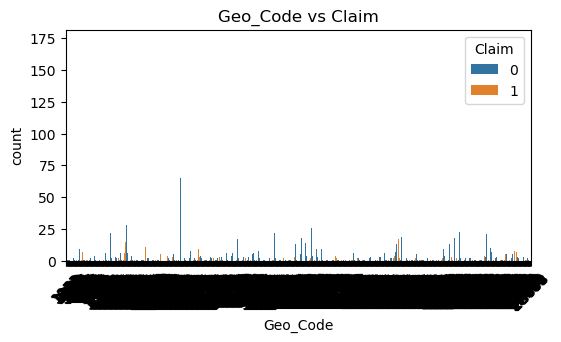

In [30]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="Claim", data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Claim")

    plt.show()
    

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(15,12))
plt.tight_layout()
plt.show()

##### From the above, we saw that there was no useful relationship between Customer Id and the target.

## Let us do some Data Preprocessing and Feature Engineering

#### Train-Test Split

In [31]:
x = df.drop(["Customer Id", "Claim"], axis=1)
y = df["Claim"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#### Preprocessing Pipeline

In [32]:
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),
                                               ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

## Now let us build some models with our clean and preprocessed data

#### Model 1: Logistic Regression

In [33]:
log_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression(class_weight='balanced'))])

log_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object'))])),
                ('model', LogisticRegression(class_weight='balanced'))])

#### Model 2: Random Forest

In [34]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier(class_weight='balanced',
                                                            random_state=42))])

rf_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

#### Model 3: XGBoost

In [35]:
scale_pos_weight = (y_train ==0).sum() / (y_train ==1).sum()

In [36]:
xgb_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBClassifier(eval_metrics='logloss',
                                               scale_pos_weight=scale_pos_weight))])

xgb_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'NumberOfWindows',...
                               eval_metrics='logloss', feature_types=None,
                               feature_weights=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, ...))])

## Model Evaluation

In [37]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]


    print(classification_report(y_test, y_pred)),
    print("ROC-AUC:", roc_auc_score(y_test, y_prob)) 



          

    

In [38]:
evaluate_model(log_model, x_test, y_test)
evaluate_model(rf_model, x_test, y_test)
evaluate_model(xgb_model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1105
           1       0.37      0.53      0.43       327

    accuracy                           0.69      1432
   macro avg       0.60      0.63      0.61      1432
weighted avg       0.73      0.69      0.70      1432

ROC-AUC: 0.6840245201821025
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1105
           1       0.46      0.23      0.31       327

    accuracy                           0.76      1432
   macro avg       0.63      0.57      0.58      1432
weighted avg       0.72      0.76      0.73      1432

ROC-AUC: 0.664984017601395
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1105
           1       0.38      0.54      0.45       327

    accuracy                           0.69      1432
   macro avg       0.61      0.64      0.62      1432
weighted avg       

##### Let us plot some confusion matrix heatmap to consolidate our point

In [39]:
    def plot_confusion_heatmap(model, x_test, y_test, model_name):
        
        
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

        plt.title(f"confusion matrix - {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()





                

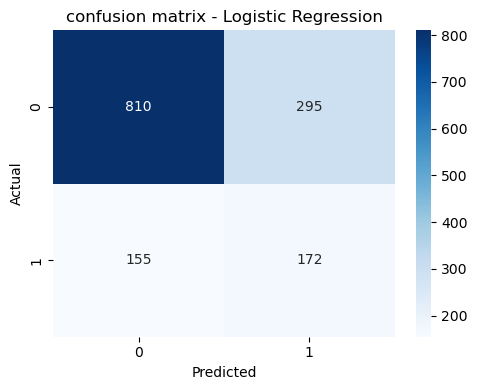

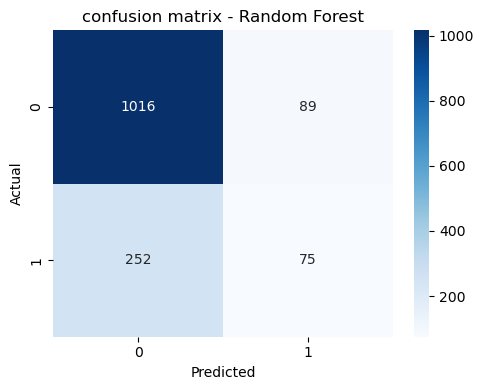

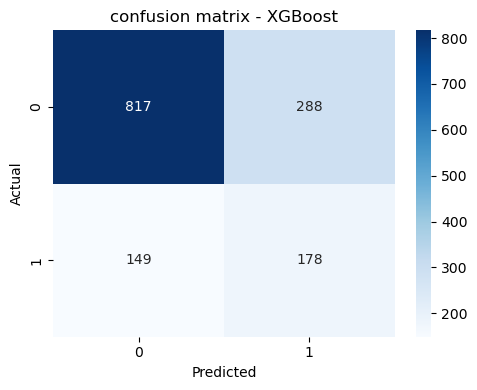

In [40]:
plot_confusion_heatmap(log_model, x_test, y_test, "Logistic Regression")

plot_confusion_heatmap(rf_model, x_test, y_test, "Random Forest")

plot_confusion_heatmap(xgb_model, x_test, y_test, "XGBoost")







#### It should be noted that our focus is on the recall report because it tells us how many actual positive cases the model was able to identify in its prediction. However, since there is class imbalance in our targe varible(majority class-0, minority class-1), the model with the highest recall result for the minority class becomes the best model. Compared to Random Forest and the Logistic Regression Model, XGBoost shows improved performance in identifying customers who will file claims for the minorit class(True-Positive Cases of 175 vs 75 vs 172). XGBoost recorded the highest recall result of 54%. Though the Random Forest Model performed better for the precision for the majority class. But how focus here is more on the recall for the minority class. That is, we are really concern wether the customer will file a case. XGBoost has proven to be less partial and reliable in that despite the class imbalance, it could still consider to a greater extent the minority class with recall result of 54%, that is 178 True-Positve cases. The Logistic Regression performed better than the Random Forest Model in predicting the recall cases for the minority class. The classification report shows that the Logistic Regression model is less bias and more reliable than the Random Forest model since it produced a recall result of 53% and 73% recall for the marity class. This is evident in the confusion matrix heatmap where it recorded a higher number of True-Positive cases than than the random forest model. The ROC-AUC of 68% for the logistic regression model shows a moderate descriminatory power. It also means that the model can moderately distinguish between positive cases and negative cases better than the two other models. Though Random Forest recorded the highes accuracy result, but accuracy score is not reliable because of the class imbalance. We can still do some model optimization to enable the models perform better.

### Now let us see how we can  optmize or improve on our model for a more reliable result using Smote

In [41]:
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x_train.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols), 
                                    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)])


                                

In [42]:
pipeline = Pipeline(steps=[("preprocess", preprocessor), ("smote", SMOTE(random_state=42)),
                           ("model", XGBClassifier(eval_metric="logloss", random_state=42))])



pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'NumberOfWindows', 'G...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [43]:
y_pred = pipeline.predict(x_test)

y_prob = pipeline.predict_proba(x_test)


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1105
           1       0.45      0.33      0.38       327

    accuracy                           0.76      1432
   macro avg       0.63      0.61      0.61      1432
weighted avg       0.73      0.76      0.74      1432



### From the evaluation report above, we discover that applying smote to improve our model has increased the recall for the majority class but reduced recall score for the minority class. We noticed the class imbalance still playing a role in the classification report.

In [45]:
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x_train.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols), 
                                    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)])


                                



In [46]:

rf_pipeline = Pipeline(steps=[("preprocess", preprocessor), ("smote", SMOTE(random_state=42)),
                           ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))])



In [47]:
rf_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [48]:
y_pred = rf_pipeline.predict(x_test)

y_prob = rf_pipeline.predict_proba(x_test)


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1105
           1       0.42      0.27      0.33       327

    accuracy                           0.75      1432
   macro avg       0.61      0.58      0.59      1432
weighted avg       0.72      0.75      0.73      1432



#### From the above classification report, we noticed that applying smote to optimize the Random Forest Model for better performance has actual improved the performance of the model with recall score of 33% for the minority class.